# Optical Characterization of Silicon: Swanepoel Method enhaced with Machine Learning

Explanation

## 1) Libraries

Explanation

In [16]:
# Basic libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [17]:
# Information on autoreload: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# We import the functions from our package
from src.models import * 
from src.generating import * 

import src.learning_NN as learning_NN
import src.general as general

ModuleNotFoundError: No module named 'src.learning_NN'

## 2) Generating multiple spectra

Explanation

In [11]:
# PARAMETERS

# Wavelength range
wv = torch.arange(800, 2100, 4) 

# Ideal transmission of a transparent substrate
Ts = torch.ones(len(wv))*0.92

# Models for refractive index n and extinction coefficient k 
model_n = 'Wemple-DiDomenico'
model_k = 'Urbach'

In [12]:
# GENERATING DATASET
generate = generating(wavelength = wv, T_substrate = Ts, \
    model_n = model_n, model_k = model_k)

# Input: Transmission spectrum {T(lambda)} = {0.1, 0.15, 0.2, 0.1, ...}
# Output: Envelope of the spectrum {T_max(lambda)} = {0.6, 0.61, 0.62, 0.65, ...}
input, output = generate.spectra(n_samples = 10000)


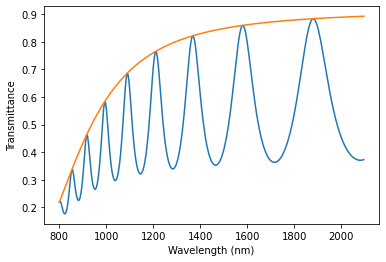

In [13]:
# VISUALIZING ONE SPECTRUM
plt.plot(wv, input[0])
plt.plot(wv, output[0])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance')
plt.savefig('output/example_TM.png',bbox_inches='tight', pad_inches=0)
plt.show()

## 3) Learning the transmission

Explanation

In [24]:
predicted_output = learning.hola(input, output)
predicted_output.shape

torch.Size([10000, 325])

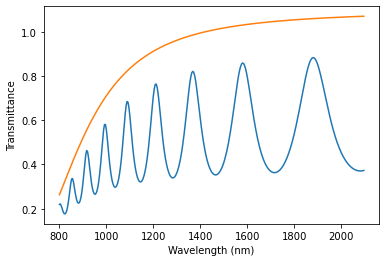

In [22]:
# VISUALIZING THE RESULT
plt.plot(wv, input[0])
plt.plot(wv, predicted_output[0])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance')
plt.savefig('output/example_TM.png',bbox_inches='tight', pad_inches=0)
plt.show()

## 4) Trying with a real spectrum

### 4.1. Download the real spectrum

output/Original_Vs_NIR_spectrum_1.png


0

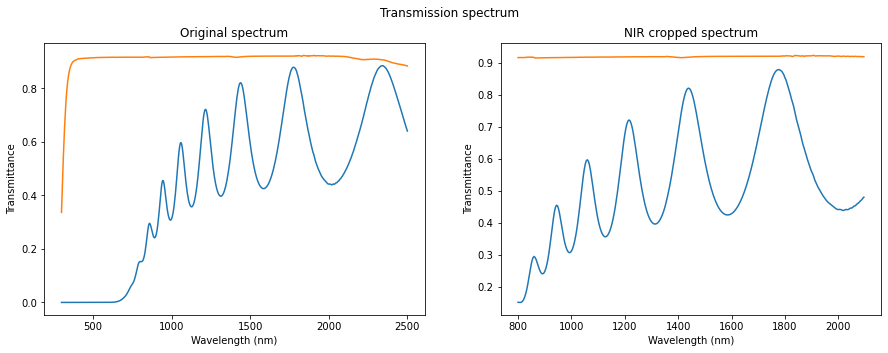

In [24]:
# Names of the TXT files with the sample transmittance data and the substrate alone
type_sample = 'real'    # Either 'real' or 'simulated' spectra  
sample = 1              # For the 'real' spectra, there are 1 to 14 samples

name_Sample = 'spectrum_'+str(sample)
name_Substrate= 'Substrate_'+str(sample)


# We obtain the wavelength (wv), the sample transmission (T), and the substrate alone 
# transmisison (Ts) as torch tensors. We plot the original spectrum and the spectrum cropped to
# the NIR region and we save the plot in the output folder.
wv, T, Ts = general.load_spectra(type_sample = type_sample, name_Sample = name_Sample, \
    name_Substrate = name_Substrate)

figtitle = 'Original_Vs_NIR_' + name_Sample
general.save_fig_as_png(figtitle)

### 4.2. Applying our model

In [7]:
# Write here